In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
movies = pd.read_csv("/content/drive/MyDrive/ml-latest-small/ml-latest-small/movies.csv")
ratings = pd.read_csv("/content/drive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv")
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [12]:
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

print("Unique users:", ratings['userId'].nunique())
print("Unique movies:", ratings['movieId'].nunique())


Movies shape: (9742, 3)
Ratings shape: (100836, 4)
Unique users: 610
Unique movies: 9724


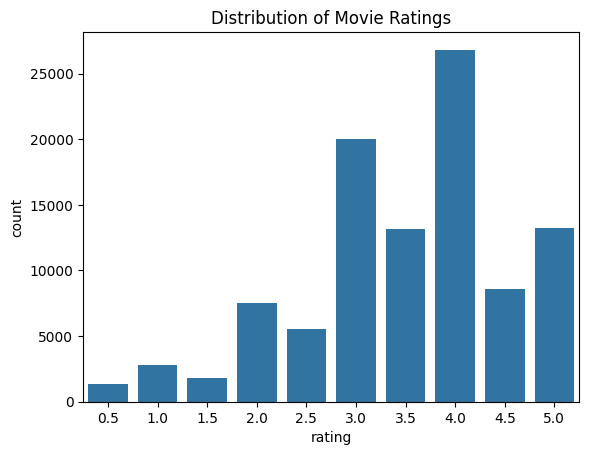

In [13]:
sns.countplot(x='rating', data=ratings)
plt.title("Distribution of Movie Ratings")
plt.show()


In [14]:
data = pd.merge(ratings, movies, on="movieId")
data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [15]:
movies['genres'] = movies['genres'].replace("(no genres listed)", "")


In [16]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [17]:
indices = pd.Series(movies.index, index=movies['title'])

def content_recommend(movie_title, n=5):
    idx = indices[movie_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]

    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]


In [18]:
content_recommend("Toy Story (1995)")


,title
1706,Antz (1998)
2355,Toy Story 2 (1999)
2809,"Adventures of Rocky and Bullwinkle, The (2000)"
3000,"Emperor's New Groove, The (2000)"
3568,"Monsters, Inc. (2001)"
